## Kod musi być odpalony w lokalizacji w ktorej znajdują sie defaultowe jsony do malarii i w którym w folderze images są obrazki z ktorych bedzie wycinał

In [1]:
import os
import json
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# wczytaj plik JSON
with open('training.json') as f:
    data = json.load(f)

In [3]:
# wczytaj plik JSON
with open('training.json') as f:
    data1 = json.load(f)

In [4]:
data1[10]

{'image': {'checksum': 'f07de588abfee1122cc9758cf94d7904',
  'pathname': '/images/f65a1633-9935-4984-a285-a60d30aa1707.png',
  'shape': {'r': 1200, 'c': 1600, 'channels': 3}},
 'objects': [{'bounding_box': {'minimum': {'r': 363, 'c': 1199},
    'maximum': {'r': 480, 'c': 1312}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 570, 'c': 160},
    'maximum': {'r': 677, 'c': 285}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 976, 'c': 936},
    'maximum': {'r': 1096, 'c': 1061}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 203, 'c': 260},
    'maximum': {'r': 320, 'c': 381}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 611, 'c': 728},
    'maximum': {'r': 722, 'c': 837}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 343, 'c': 272},
    'maximum': {'r': 453, 'c': 380}},
   'category': 'red blood cell'},
  {'bounding_box': {'minimum': {'r': 804, 'c': 140},
    'm

In [5]:
len(data1)

1208

In [6]:
# Ścieżka do folderu, w którym znajduje się plik JSON z danymi
data_folder = "C:/Users/Dell/Downloads/malaria/malaria/malaria"

# Ścieżka do folderu, w którym znajdują się obrazy
image_folder = "C:/Users/Dell/Downloads/malaria/malaria/malaria/"

# Ścieżka do folderu, w którym mają być zapisane wycinki z obrazów
cropped_folder = "C:/Users/Dell/Downloads/malaria/malaria/malaria/cropped/"

In [7]:
pathname = data[0]['image']['pathname']

In [8]:
image_path = image_folder + pathname
image_path

'C:/Users/Dell/Downloads/malaria/malaria/malaria//images/8d02117d-6c71-4e47-b50a-6cc8d5eb1d55.png'

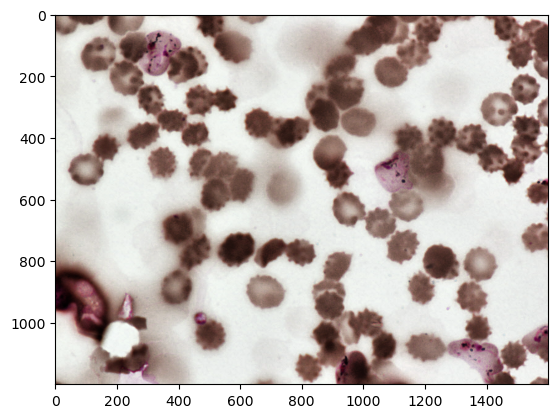

In [9]:
image = cv2.imread(image_path)
plt.imshow(image)

In [10]:
# Utworzenie słownika folderów dla każdej kategorii
category_folders = {}
for i in range(len(data)):
    objects = data[i]['objects']
    for j in range(len(objects)):
        category = objects[j]['category']
        if category not in category_folders:
            folder_path = os.path.join(cropped_folder, category)
            os.makedirs(folder_path, exist_ok=True)
            category_folders[category] = folder_path

In [11]:
# Iteracja po obiektach w pliku JSON i wyodrębnienie informacji o bounding boxach
for i in range(len(data)):
    pathname = data[i]['image']['pathname']
    # Utworzenie pełnej ścieżki do pliku z obrazem
    image_path = image_folder + pathname
    # Wczytanie obrazu za pomocą biblioteki CV2
    image = cv2.imread(image_path)
    objects = data[i]['objects']
    for j in range(len(objects)):
        bounding_box = objects[j]['bounding_box']
        x = bounding_box['minimum']['c']
        y = bounding_box['minimum']['r']
        w = bounding_box['maximum']['c'] - x
        h = bounding_box['maximum']['r'] - y
        # Wycięcie fragmentu obrazu
        cropped_image = image[y:y+h, x:x+w]
        # Zapisanie wycinka z obrazu na dysku
        category = objects[j]['category']
        folder_path = category_folders[category]
        cv2.imwrite(os.path.join(folder_path, '{}-{}.png'.format(i,j)), cropped_image)